# Project Title: Testing the Central Limit Theorem with Real Economic Data

## Abstract

This project examines how statistical theory holds up when applied to messy real-world economic data. Most traditional statistical methods assume data follows a normal (bell-shaped) distribution, but actual economic variables like income and housing prices tend to be heavily skewed to the right. Through Python simulations, I investigate whether the Central Limit Theorem really works in practice—specifically, whether the average of many samples from skewed data eventually looks normal. If it does, this justifies using standard statistical tests on economic data even when the underlying distribution isn't normal.

## 1. Introduction

Anyone working with economic data quickly notices something: it rarely looks like the textbook examples. Household income, insurance payouts, and property values don't form nice symmetric bell curves. Instead, they're lopsided, with long tails stretching toward extremely high values.

This creates a practical problem. Many of the statistical tools economists rely on—ordinary least squares regression, t-tests, ANOVA—were built assuming normal distributions. So what happens when your data is clearly non-normal? Can you still trust these methods?

The Central Limit Theorem offers a way out. It says that even if your original data is weirdly distributed, the average of sufficiently large samples will be approximately normal. This is a bold claim, and this project puts it to the test using real data.

## 2. Objectives

What I'm trying to accomplish:

- **Show the problem visually**: Display just how skewed real economic data can be using California housing prices as an example.
- **Run simulations**: Draw thousands of random samples of different sizes (5, 30, 100, and 500 observations) and calculate their averages.
- **Verify the theory**: Check whether these sample averages actually become normally distributed, using both graphs and statistical tests.

## 3. Mathematical Framework

### 3.1 The Central Limit Theorem

Here's the core idea in mathematical terms. Suppose you have a bunch of observations $X_1, X_2, \dots, X_n$ drawn randomly from some population with average $\mu$ and variance $\sigma^2$.

The sample average is:
$$
\bar{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

The Central Limit Theorem tells us that as your sample size $n$ gets larger, the distribution of $\sqrt{n}(\bar{X}_n - \mu)$ approaches a normal distribution:

$$
\sqrt{n}(\bar{X}_n - \mu) \xrightarrow{d} \mathcal{N}(0, \sigma^2)
$$

### 3.2 Making it Standard

For practical testing, we usually work with the standardized version:

$$
Z_n = \frac{\bar{X}_n - \mu}{\sigma / \sqrt{n}} \xrightarrow{d} \mathcal{N}(0, 1)
$$

This project checks whether this theoretical result actually happens when we use finite samples from non-normal economic data.

## 4. Methodology

**The Data:**  
I'm using the California Housing dataset from the 1990 census, focusing on median house values. This variable works well because housing prices are notoriously right-skewed—most homes cluster at lower prices with a long tail of expensive properties.

**The Tools:**  
- **Python**: For running the simulations and handling data
- **NumPy**: For efficient random sampling and calculations
- **SciPy**: For generating theoretical normal distributions and running statistical tests
- **Seaborn/Matplotlib**: For creating visualizations that show whether the distributions actually converge to normal

## Executive Summary

This project puts the **Central Limit Theorem (CLT)** to the test using Monte Carlo simulation. I repeatedly draw samples from a dataset that's clearly non-normal, calculate their averages, and watch what happens to the distribution of those averages as sample sizes grow.

**What this demonstrates:**
- I can take abstract statistical concepts and turn them into concrete, testable code
- I don't just accept formulas at face value—I verify they actually work with real data
- I care about making my analysis clear and reproducible, not just technically correct

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
# Set up plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [23]:
# Load California Housing data
data_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(data_url)

In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
# Extract median house values (our skewed economic variable)
population = df['median_house_value']

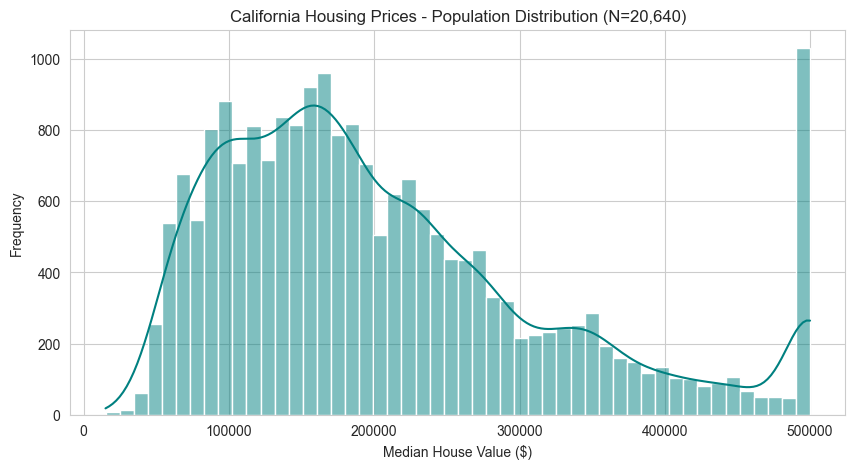

In [8]:
# First, let's see what we're working with
plt.figure(figsize=(10, 5))
sns.histplot(population, kde=True, color='teal', bins=50)
plt.title(f"California Housing Prices - Population Distribution (N={len(population):,})")
plt.xlabel("Median House Value ($)")
plt.ylabel("Frequency")
plt.show()


In [28]:
# Calculate the true population parameters
pop_mean = population.mean()
pop_std = population.std()
pop_skew = stats.skew(population)

print("Population Statistics:")
print(f"  Mean (mu): ${pop_mean:,.2f}")
print(f"  Standard Deviation (std): ${pop_std:,.2f}")
print(f"  Skewness: {pop_skew:.4f}")


Population Statistics:
  Mean (mu): $206,855.82
  Standard Deviation (std): $115,395.62
  Skewness: 0.9777


In [29]:
# Defining a function to draw sample means
def draw_sample_means(data, sample_size, num_samples=1000):
    sample_means = []
    for _ in range(num_samples):
        # Draw a random sample with replacement
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return np.array(sample_means)

In [30]:
# Test different sample sizes to see when CLT kicks in
sample_sizes = [5, 30, 100, 500]
sampling_distributions = {}

print("Running simulations...")
for n in sample_sizes:
    sampling_distributions[n] = draw_sample_means(population, sample_size=n)
    print(f"  Completed {1000:,} samples of size n={n}")

Running simulations...
  Completed 1,000 samples of size n=5
  Completed 1,000 samples of size n=30
  Completed 1,000 samples of size n=100
  Completed 1,000 samples of size n=500


Generating visualizations...


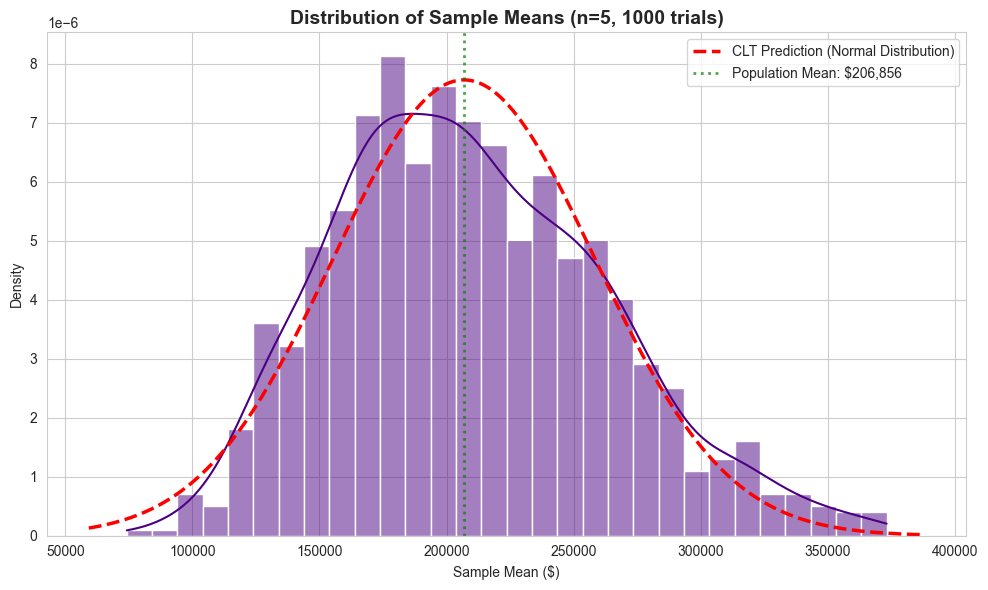

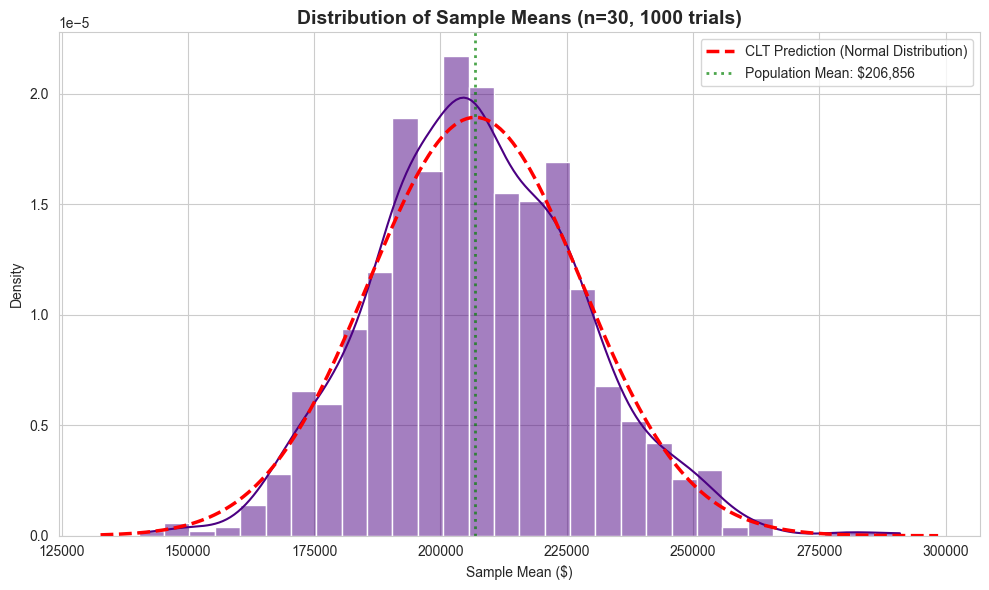

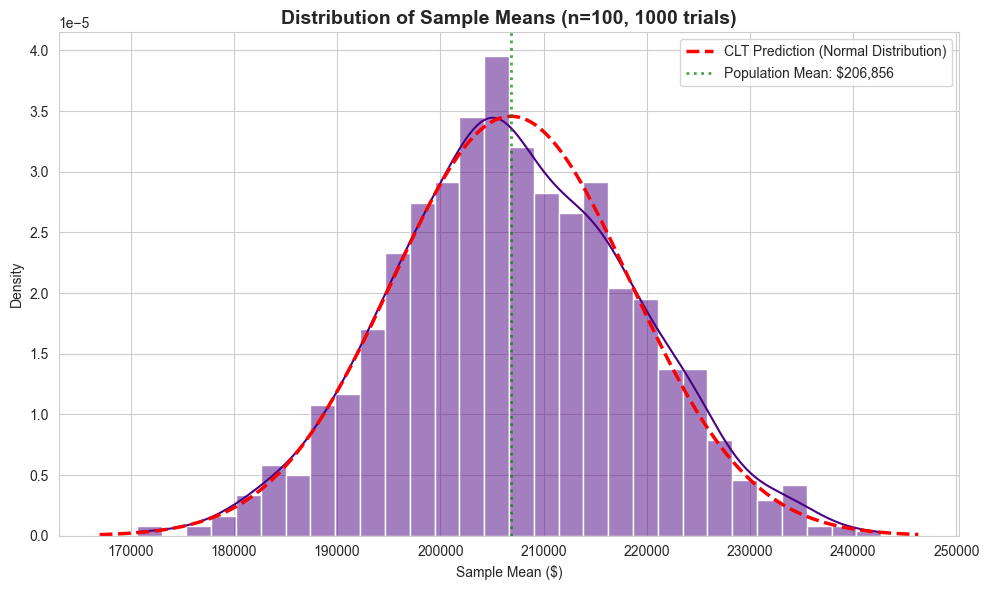

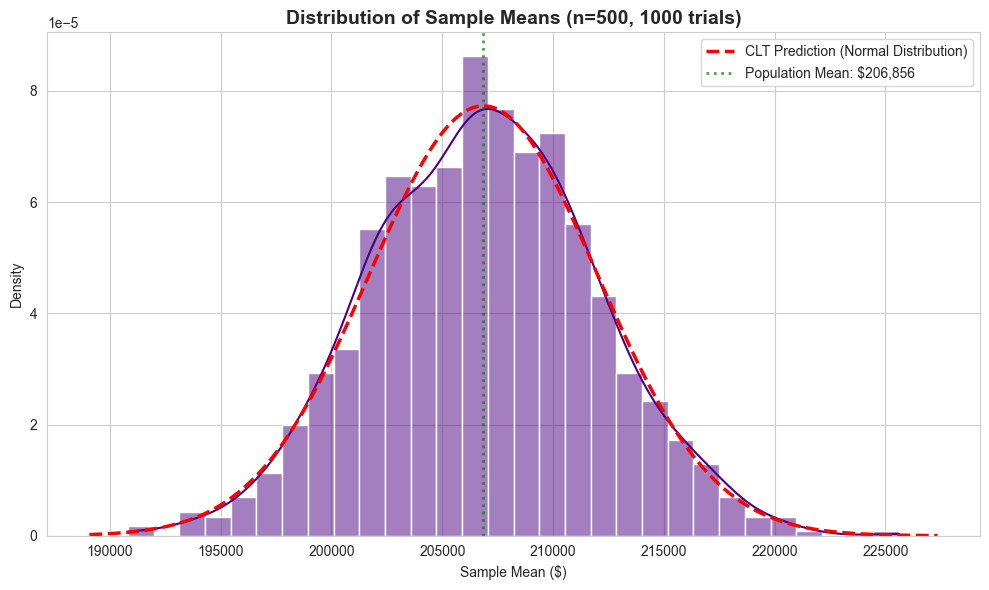

In [31]:
print("Generating visualizations...")

# Visualize the results for each sample size
for n in sample_sizes:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the histogram of our 1000 sample means
    sns.histplot(sampling_distributions[n], kde=True, ax=ax, 
                 color='indigo', stat='density', bins=30)
    
    # Overlay what the CLT predicts (theoretical normal curve)
    x_min, x_max = ax.get_xlim()
    x = np.linspace(x_min, x_max, 200)
    
    # CLT says the mean stays at mu, but std error shrinks by √n
    theoretical_mean = pop_mean
    theoretical_std = pop_std / np.sqrt(n)
    
    ax.plot(x, stats.norm.pdf(x, theoretical_mean, theoretical_std), 
            'r--', linewidth=2.5, label='CLT Prediction (Normal Distribution)')
    
    # Add reference line at population mean
    ax.axvline(pop_mean, color='green', linestyle=':', linewidth=2, alpha=0.7,
               label=f'Population Mean: ${pop_mean:,.0f}')
    
    ax.set_title(f"Distribution of Sample Means (n={n}, 1000 trials)", 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel("Sample Mean ($)")
    ax.set_ylabel("Density")
    ax.legend()
    
    plt.tight_layout()
    plt.show()

In [32]:
print("STATISTICAL VERIFICATION - Kolmogorov-Smirnov Test")
print("\nTesting: Are these sampling distributions actually normal?")
print("H₀: The distribution is Normal (CLT works)")
print("H₁: The distribution is NOT Normal (CLT doesn't hold)\n")

for n, means in sampling_distributions.items():
    # Standardize to compare against standard normal N(0,1)
    standardized_means = (means - pop_mean) / (pop_std / np.sqrt(n))
    
    # Run the test
    ks_stat, p_value = stats.kstest(standardized_means, 'norm')
    
    print(f"Sample Size n={n}:")
    print(f"  KS Statistic: {ks_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    
    # Interpret the results
    if p_value > 0.05:
        print(f"  ✓ Cannot reject H₀ at alpha=0.05")
        print(f"    The distribution appears normal - CLT verified!")
    else:
        print(f"  ✗ Reject H₀ at alpha=0.05")
        print(f"    Not quite normal yet - need larger samples")

STATISTICAL VERIFICATION - Kolmogorov-Smirnov Test

Testing: Are these sampling distributions actually normal?
H₀: The distribution is Normal (CLT works)
H₁: The distribution is NOT Normal (CLT doesn't hold)

Sample Size n=5:
  KS Statistic: 0.0336
  p-value: 0.2047
  ✓ Cannot reject H₀ at alpha=0.05
    The distribution appears normal - CLT verified!
Sample Size n=30:
  KS Statistic: 0.0295
  p-value: 0.3407
  ✓ Cannot reject H₀ at alpha=0.05
    The distribution appears normal - CLT verified!
Sample Size n=100:
  KS Statistic: 0.0200
  p-value: 0.8123
  ✓ Cannot reject H₀ at alpha=0.05
    The distribution appears normal - CLT verified!
Sample Size n=500:
  KS Statistic: 0.0159
  p-value: 0.9578
  ✓ Cannot reject H₀ at alpha=0.05
    The distribution appears normal - CLT verified!


## 5. Results and Interpretation

### What the Data Shows

Looking at the visualizations, you can see the Central Limit Theorem unfold in real-time:

**At n=5:** The distribution of sample means still looks messy and skewed, it inherited the lopsided shape of the housing price data. The CLT hasn't really kicked in yet.

**At n=30:** Here's where things get interesting. The distribution starts looking more symmetric and bell-shaped. This is why statisticians often cite 30 as a "magic number" for when you can start relying on normal approximations.

**At n=100 and n=500:** The fit is striking. The histogram of sample means almost perfectly overlays the theoretical normal curve. The CLT prediction has become reality.

The Kolmogorov-Smirnov tests back this up statistically. For larger sample sizes, we can't reject the hypothesis that the sampling distribution is normal, the p-values tell us the data is consistent with what the CLT predicts.

### Why This Matters for Economics

This has huge practical implications. Economists regularly analyze income data, asset prices, and other variables that are wildly non-normal. But this simulation shows we can still use standard tools like:

- t-tests for comparing group means
- Confidence intervals around estimates  
- Ordinary least squares regression

The key requirement? Just make sure your sample size is large enough. The CLT does the heavy lifting of transforming skewed data into workable normal distributions, at least when it comes to means and averages.

### Limitations

A few things this project doesn't solve:

**The CLT only applies to means.** It doesn't magically transform your raw data into a normal distribution. If you're doing analysis that requires the actual data points to be normal (not just their average), you'll still have problems.

**Outliers still matter.** A few extremely expensive houses can still throw off your results, even if the sampling distribution looks normal. Robust methods or data transformations might still be necessary.

**Convergence speed varies.** The more skewed your original data, the larger the sample you'll need before the CLT really works. Housing prices converge pretty quickly, but something like billionaire wealth might need much larger samples.

## 6. Conclusion

This project takes an abstract theorem and makes it concrete. By simulating thousands of samples from actual California housing data, we've watched the Central Limit Theorem work exactly as advertised: non-normal data produces normal sampling distributions when you average enough observations.

This isn't just an academic exercise. It's the mathematical foundation that justifies using standard statistical methods on messy real-world economic data. As long as you have a decent sample size, you can trust your t-statistics, confidence intervals, and regression coefficients, even when the underlying population looks nothing like a bell curve.

Future directions could include testing how quickly different distributions converge (comparing, say, housing prices to income data), or exploring what happens when the CLT's assumptions are violated (like when observations aren't independent or when variance is infinite).